# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import Warnings to suppress unnecessary warnings

warnings.filterwarnings("ignore")

# Load the dataset car_detail_en.csv

In [2]:
df = pd.read_csv("dataset/car_detail_en.csv")

In [3]:
df.shape

(30652, 21)

In [5]:
df.head().T

,0,1,2,3,4
ad_id,17042,53794,73954,74150,87573
origin,Domestic assembly,Imported,Domestic assembly,Imported,Domestic assembly
condition,New car,New car,New car,New car,New car
car_model,Truck,SUV,Crossover,SUV,Crossover
mileage,0 Km,0 Km,0 Km,0 Km,0 Km
exterior_color,White,Black,Silver,White,Silver
interior_color,gray,Black,Brown,Black,gray
num_of_doors,2-door,5-door,5-door,5-door,5-door
seating_capacity,2-seat,7-seat,8-seat,5-seat,8-seat
engine,Petrol\t1.0 L,Petrol\t3.4 L,Petrol\t2.0 L,Petrol\t1.8 L,Petrol\t2.0 L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30652 entries, 0 to 30651
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                30652 non-null  int64  
 1   origin               30652 non-null  object 
 2   condition            30652 non-null  object 
 3   car_model            30652 non-null  object 
 4   mileage              30652 non-null  object 
 5   exterior_color       30652 non-null  object 
 6   interior_color       30652 non-null  object 
 7   num_of_doors         30652 non-null  object 
 8   seating_capacity     30652 non-null  object 
 9   engine               30652 non-null  object 
 10  fuel_system          6742 non-null   object 
 11  transmission         30652 non-null  object 
 12  drive_type           30652 non-null  object 
 13  fuel_consumption     30652 non-null  object 
 14  describe             30652 non-null  object 
 15  brand                30652 non-null 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,30652.0,4.784121e+06,310337.598420,17042.0,4807684.25,4864924.0,4903282.0,4930147.0
year_of_manufacture,30620.0,2.017320e+03,5.331772,1990.0,2015.00,2019.0,2022.0,2023.0


In [9]:
df.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'fuel_system', 'transmission', 'drive_type',
       'fuel_consumption', 'describe', 'brand', 'grade', 'year_of_manufacture',
       'car_name', 'price. price', 'url'],
      dtype='object')

# Data cleaning

In [10]:
# Check for missing values
df.nunique()

ad_id                  30652
origin                     2
condition                  2
car_model                 10
mileage                 1924
exterior_color            18
interior_color            18
num_of_doors              12
seating_capacity          24
engine                    95
fuel_system              802
transmission               4
drive_type                 6
fuel_consumption          76
describe               28987
brand                     76
grade                    479
year_of_manufacture       34
car_name                5809
price. price            2206
url                    30652
dtype: int64

In [12]:
# Check for missing values
df.isnull().sum()

ad_id                      0
origin                     0
condition                  0
car_model                  0
mileage                    0
exterior_color             0
interior_color             0
num_of_doors               0
seating_capacity           0
engine                     0
fuel_system            23910
transmission               0
drive_type                 0
fuel_consumption           0
describe                   0
brand                      0
grade                      0
year_of_manufacture       32
car_name                   0
price. price               0
url                        0
dtype: int64

In [13]:
# Drop missing values 
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

ad_id                  0
origin                 0
condition              0
car_model              0
mileage                0
exterior_color         0
interior_color         0
num_of_doors           0
seating_capacity       0
engine                 0
fuel_system            0
transmission           0
drive_type             0
fuel_consumption       0
describe               0
brand                  0
grade                  0
year_of_manufacture    0
car_name               0
price. price           0
url                    0
dtype: int64

In [15]:
#Duplicate Check
df.duplicated().sum()

0

## Categorical Features

In [17]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['origin', 'condition', 'car_model', 'mileage', 'exterior_color',
       'interior_color', 'num_of_doors', 'seating_capacity', 'engine',
       'fuel_system', 'transmission', 'drive_type', 'fuel_consumption',
       'describe', 'brand', 'grade', 'car_name', 'price. price', 'url'],
      dtype='object')

In [24]:
# Drop the 'url' column
df.drop('url', axis=1, inplace=True)

In [25]:
df.select_dtypes(include='object').columns

Index(['origin', 'condition', 'car_model', 'mileage', 'exterior_color',
       'interior_color', 'num_of_doors', 'seating_capacity', 'engine',
       'fuel_system', 'transmission', 'drive_type', 'fuel_consumption',
       'describe', 'brand', 'grade', 'car_name', 'price. price'],
      dtype='object')

## Numerical Features

In [18]:
# Numerical columns
df.select_dtypes(exclude='object').columns


Index(['ad_id', 'year_of_manufacture'], dtype='object')

In [20]:
# Drop the 'id' column
df.drop('ad_id', axis=1, inplace=True)

In [26]:
df.select_dtypes(exclude='object').columns

Index(['year_of_manufacture'], dtype='object')

## Function to convert values to numerical

In [27]:
# Function to convert values to numerical
def convert_to_numeric(value):
    try:
        if 'Billion' in value and not 'Million' in value:
            return float(value.replace('Billion', '').replace(' ', '')) * 1e3
        elif 'Million' in value and not 'Billion' in value:
            return float(value.replace('Million', '').replace(' ', ''))
        else:
            return float(value.replace('Million', '').replace('Billion', '').replace(' ', ''))
    except:
        return None
df['log10_price'] = np.log10(df['price. price'].apply(convert_to_numeric))

df = df[~df['log10_price'].isnull()]

# log10-transform mileage
def log10_mileage(x):
    try:
        return str(round(1/5*round(5*np.log10(int(str(x).rstrip(' Km').replace(',',''))+1)),1))
    except:
        return 'None'
    
df['log10_mileage'] = df['mileage'].apply(log10_mileage)

def get_fuel_consumption(x):
    res = str(x).replace('L/100Km','').rstrip('\t')
    if res:
        return res
    else:
        return 'None'

df['fuel_consumption'] = df['fuel_consumption'].apply(get_fuel_consumption)

df['fuel_type'] = df['engine'].apply(lambda x: str(x).split('\t')[0])


def get_engine_size(x):
    res = str(x).split('\t')[-1]
    if ' L' in res:
        return res
    else:
        return 'None'
df['engine_size'] = df['engine'].apply(get_engine_size)

# combine brand an grade
df['brand_grade'] = df['brand'] + ' ' + df['grade']

# Select only specific columns of interest
selected_cols = ['log10_price', 'origin', 'condition', 'car_model', 'log10_mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'fuel_type', 'engine_size', 'transmission', 'drive_type',
       'fuel_consumption', 'brand_grade', 'year_of_manufacture']
df = df[selected_cols]

In [28]:
print(df.shape)  # Prints the dimensions (rows and columns) of the filtered DataFrame
df.sample(10).T

(6701, 16)


,26142,1994,11244,12494,16973,9495,28389,6817,20121,12993
log10_price,2.90309,2.759668,2.600973,2.39794,2.60206,2.720986,2.775246,1.447158,1.832509,2.139879
origin,Imported,Domestic assembly,Domestic assembly,Imported,Domestic assembly,Domestic assembly,Imported,Domestic assembly,Domestic assembly,Imported
condition,New car,Used car,Used car,Used car,Used car,Used car,Used car,Used car,Used car,Used car
car_model,Sedan,Sedan,SUV,Sedan,Sedan,SUV,SUV,Van/Minivan,Hatchback,Sedan
log10_mileage,0.0,4.4,4.8,5.0,5.0,4.6,5.2,5.6,4.0,5.2
exterior_color,Red,Black,Silver,White,Grey,Red,Black,Take note,Grey,Black
interior_color,Black,Colorful,Black,-,Black,Black,Cream,Pink,Grey,Cream
num_of_doors,4-door,4-door,5-door,4-door,4-door,5-door,5-door,4-door,5-door,4-door
seating_capacity,5-seat,5-seat,5-seat,5-seat,5-seat,5-seat,7-seat,15-seat,5-seat,5-seat
fuel_type,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6701 entries, 8 to 30646
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   log10_price          6701 non-null   float64
 1   origin               6701 non-null   object 
 2   condition            6701 non-null   object 
 3   car_model            6701 non-null   object 
 4   log10_mileage        6701 non-null   object 
 5   exterior_color       6701 non-null   object 
 6   interior_color       6701 non-null   object 
 7   num_of_doors         6701 non-null   object 
 8   seating_capacity     6701 non-null   object 
 9   fuel_type            6701 non-null   object 
 10  engine_size          6701 non-null   object 
 11  transmission         6701 non-null   object 
 12  drive_type           6701 non-null   object 
 13  fuel_consumption     6701 non-null   object 
 14  brand_grade          6701 non-null   object 
 15  year_of_manufacture  6701 non-null   float

## Exploratory Data Analysis

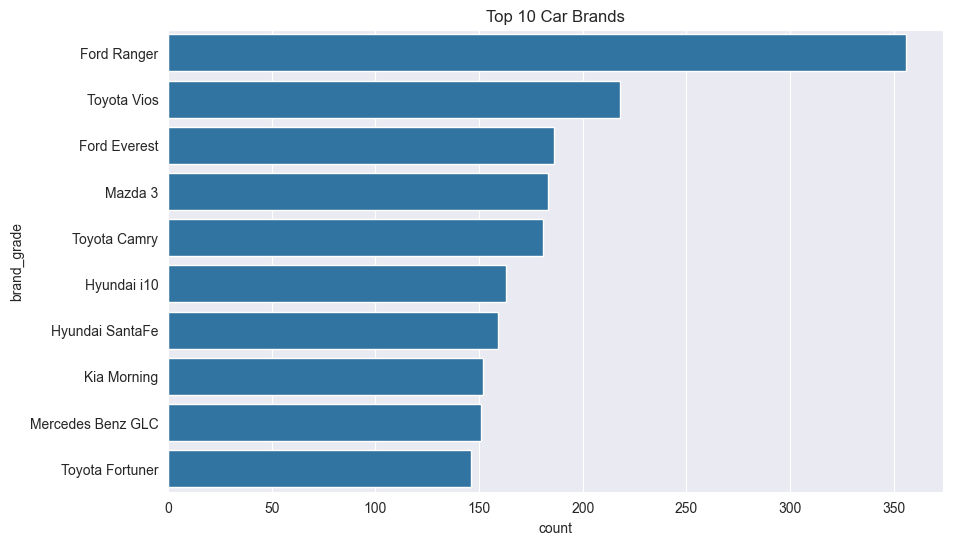

In [31]:
#Visualise different car brands
plt.figure(figsize=(10, 6))
sns.countplot(y='brand_grade', data=df, order=df['brand_grade'].value_counts().index[:10])
plt.title('Top 10 Car Brands')
plt.show()

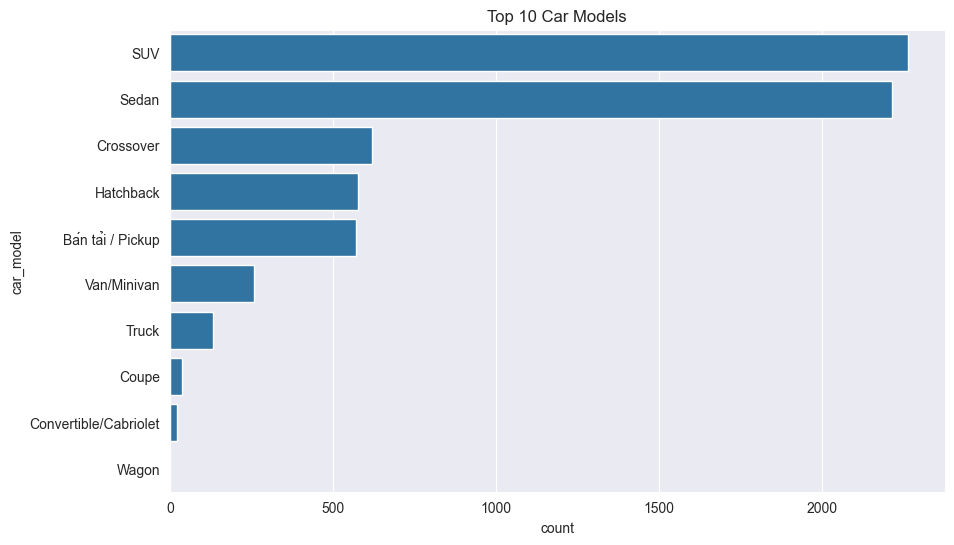

In [32]:
#Visualise different car models
plt.figure(figsize=(10, 6))
sns.countplot(y='car_model', data=df, order=df['car_model'].value_counts().index[:10])
plt.title('Top 10 Car Models')
plt.show()

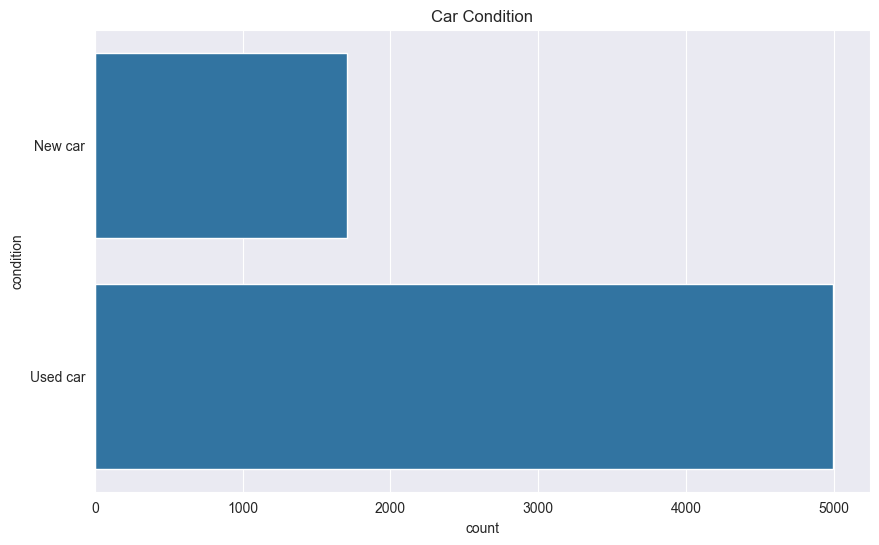

In [33]:
#Visualise different car conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='condition', data=df)
plt.title('Car Condition')
plt.show()

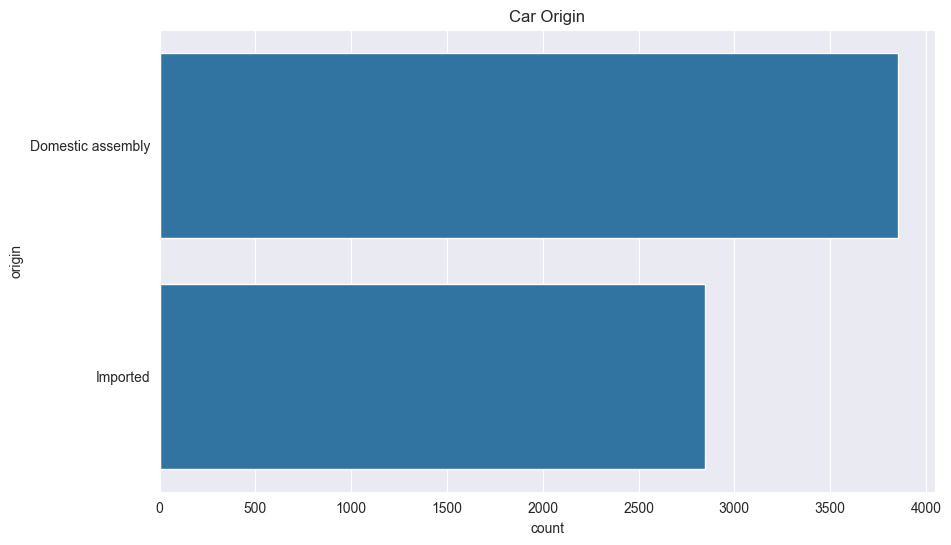

In [35]:
#Visualise different car origins
plt.figure(figsize=(10, 6))
sns.countplot(y='origin', data=df)
plt.title('Car Origin')
plt.show()

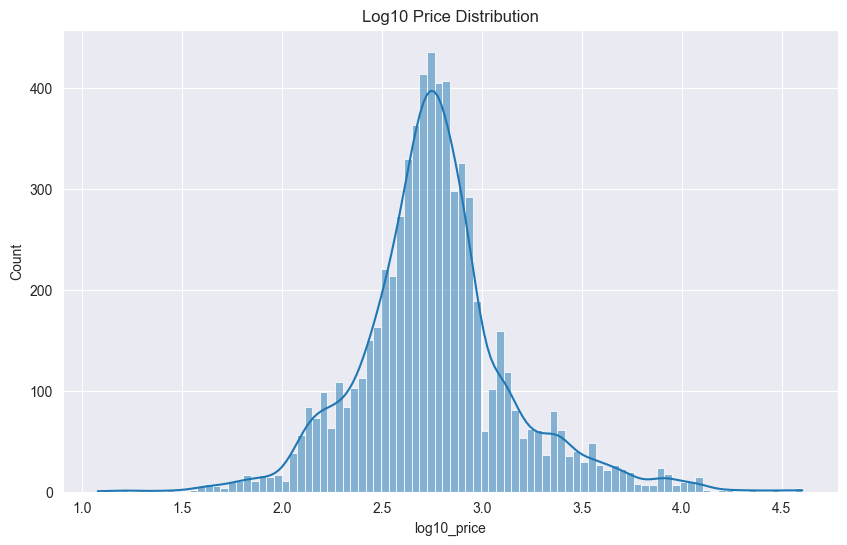

In [36]:
# Visualise the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['log10_price'], kde=True)
plt.title('Log10 Price Distribution')
plt.show()

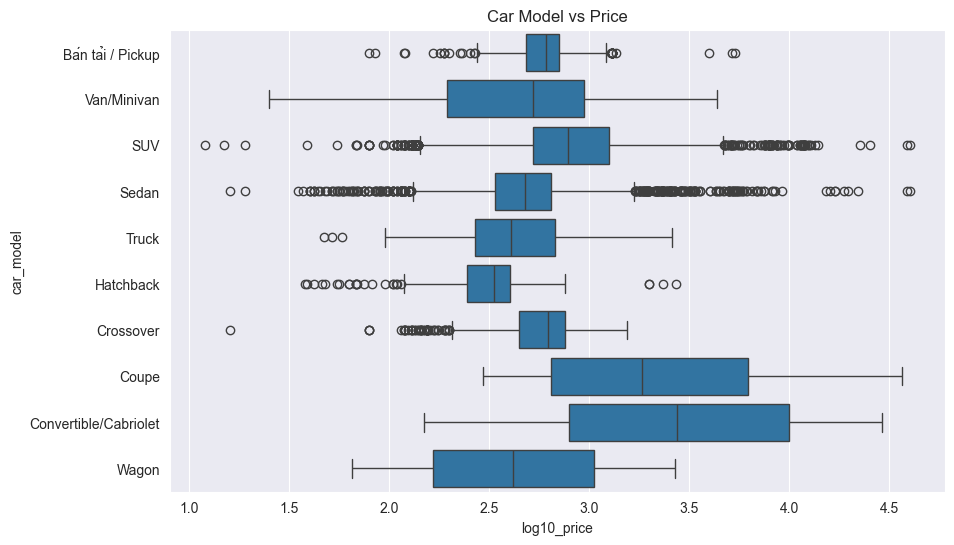

In [39]:
# car model vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='log10_price', y='car_model', data=df)
plt.title('Car Model vs Price')
plt.show()

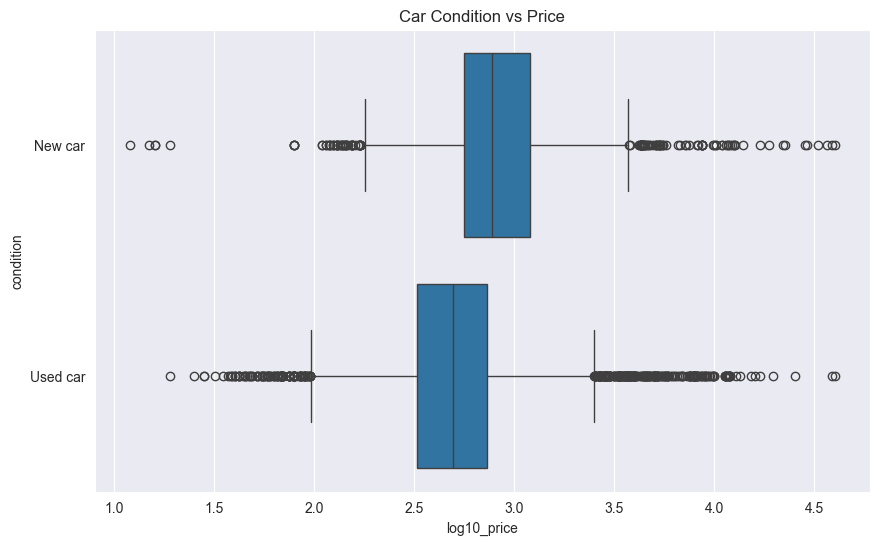

In [41]:
# car condition vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='log10_price', y='condition', data=df)
plt.title('Car Condition vs Price')
plt.show()

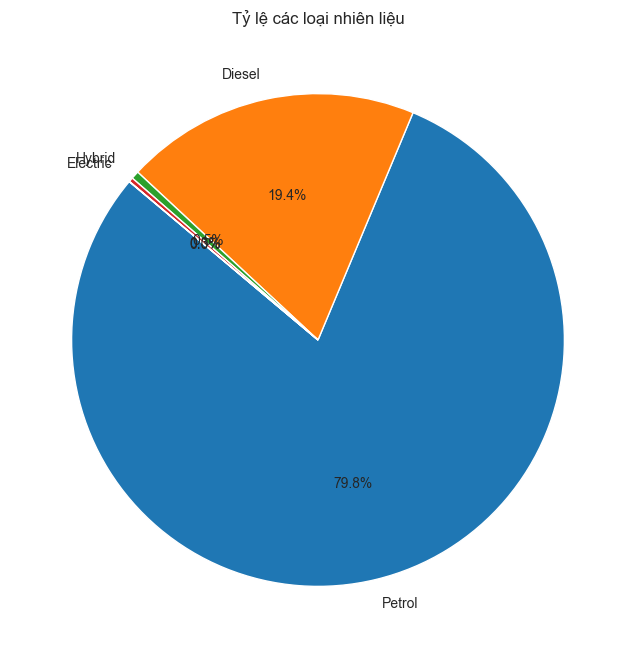

In [42]:
#Fuel type Ratio
fuel_counts = df['fuel_type'].value_counts()


# Thiết lập kích thước biểu đồ
plt.figure(figsize=(8, 8))

# Vẽ biểu đồ tròn
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)

# Thêm tiêu đề
plt.title('Tỷ lệ các loại nhiên liệu')

# Hiển thị biểu đồ
plt.show()

## Visualising Numerical features

In [44]:
# Visualising Numerical features
numerical_features = df.select_dtypes(exclude='object').columns
numerical_features


Index(['log10_price', 'year_of_manufacture'], dtype='object')

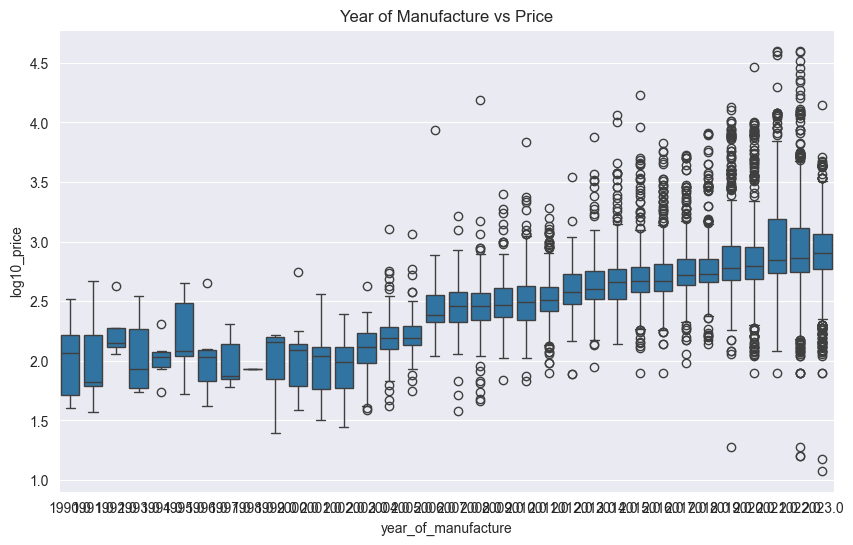

In [45]:
# Year base Vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='year_of_manufacture', y='log10_price', data=df)
plt.title('Year of Manufacture vs Price')
plt.show()

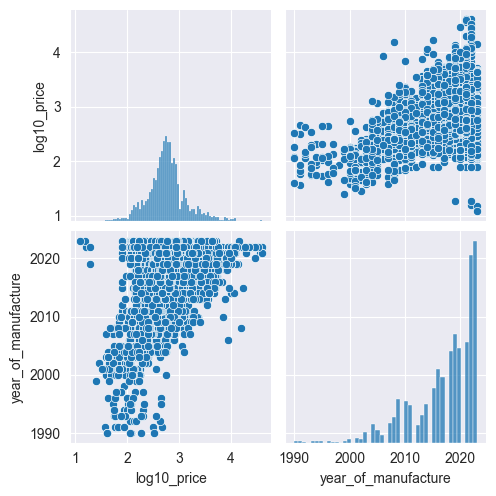

In [48]:
#Pairplot of all numerical features
ax = sns.pairplot(df[numerical_features])

In [ ]:
# covert categorical features to numerical car condition and origin


In [ ]:
df.info()